In [1]:
import warnings
warnings.filterwarnings("ignore",
                        category=FutureWarning)
import pandas as pd
data = pd.read_csv("C:/Users/asus/Downloads/Hospital_dirty.csv")
data.head()

,OrganisationID,OrganisationCode,OrganisationType,SubType,Sector,OrganisationStatus,IsPimsManaged,OrganisationName,Address1,Address2,...,County,Postcode,Latitude,Longitude,ParentODSCode,ParentName,Phone,Email,Website,"Fax,,,"
0,41987.0,RTH08,Hospital,Hospital,NHS Sector,Visible,True,John Radcliffe Hospital,NaN,Headley Way,...,Oxfordshire,OX3 9DU,51.76387405395508,-1.219792,RTH,Oxford University Hospitals NHS Foundation Trust,0300 3047777,pals@ouh.nhs.uk,http://www.ouh.nhs.uk/hospitals/jr/default.aspx,",,,"
1,78482.0,NN601,Hospital,UNKNOWN,NHS Sector,NaN,True,All Hallows Hospital (Station Road),Station Road,Ditchingham,...,Suffolk,NR35 2QL,52.46672439575195,1.446733,NN6,All Hallows Hospital,NaN,NaN,NaN,",,,"
2,41225.0,RMY02,Hospital,Hospital,NHS Sector,Visible,True,Julian Hospital,Bowthorpe Road,NaN,...,Norfolk,NR2 3TD,52.63298034667969,1.262590,RMY,Norfolk and Suffolk NHS Foundation Trust,0300 123 4969,NaN,http://www.nsft.nhs.uk,NaN
3,978694.0,RW506,Hospital,Hospital,NHS Sector,Visible,True,Windsor House,Windsor House,40 Upper Parliament Street,...,NaN,L8 7LF,53.39556884765625,-2.969381,RW4,Mersey Care NHS Foundation Trust,0151 473 0303,NaN,https://www.merseycare.nhs.uk/our-services/our...,",,,"
4,40788.0,RH834,Hospital,Hospital,NHS Sector,Visible,True,Ottery St Mary Hospital,Keegan Close,NaN,...,Devon,EX11 1DN,NaN,-3.291561,RH8,Royal Devon and Exeter NHS Foundation Trust,01404 816 000,NaN,NaN,",,,"


In [2]:
data.drop_duplicates(inplace=True)
text_cols = ['OrganisationName','City','County','OrganisationType','SubType','Sector']
for col in text_cols:
    data[col] = data[col].astype(str).str.strip().str.title()

data['Postcode'] = data['Postcode'].astype(str).str.replace(" ", "").str.upper()


In [3]:
import numpy as np

data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')



In [4]:
data = data.dropna(subset=['Latitude','Longitude'])



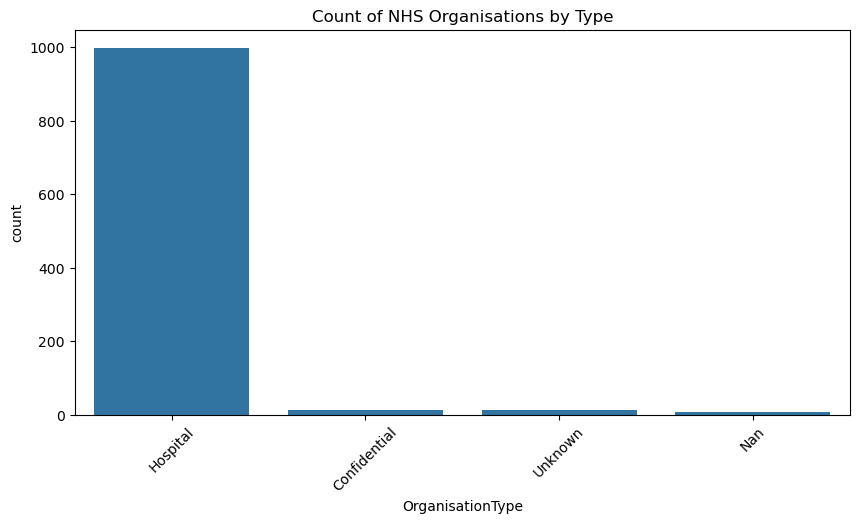

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=data, x='OrganisationType', order=data['OrganisationType'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of NHS Organisations by Type")
plt.show()


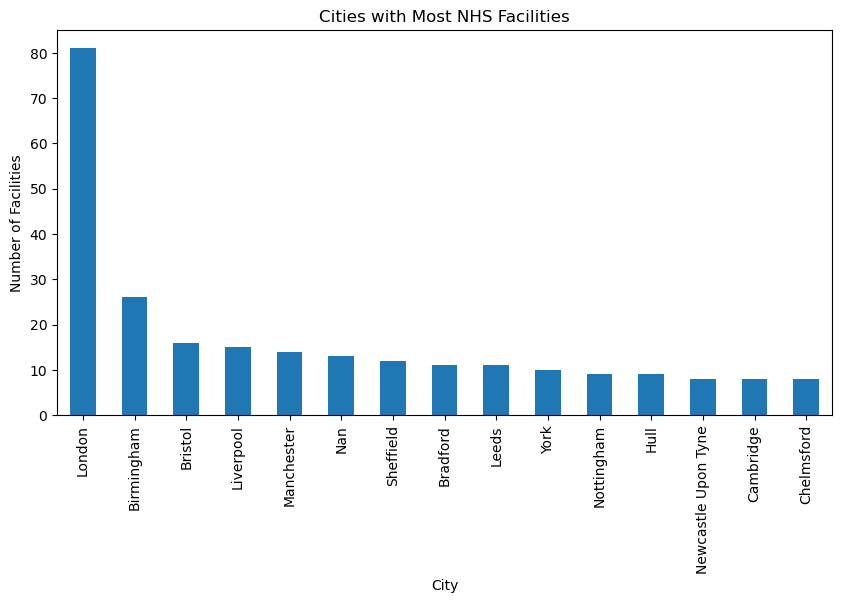

In [6]:
plt.figure(figsize=(10,5))
data['City'].value_counts().head(15).plot(kind='bar')
plt.title("Cities with Most NHS Facilities")
plt.ylabel("Number of Facilities")
plt.show()


In [7]:
import numpy as np
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
data = data.dropna(subset=['Latitude','Longitude'])



In [8]:
from folium.plugins import MarkerCluster
import folium

m = folium.Map(location=[54.5, -3], zoom_start=6)  # UK center
cluster = MarkerCluster().add_to(m)

for _, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['OrganisationName']
    ).add_to(cluster)

m


In [9]:
region_counts = data['County'].value_counts().reset_index()
region_counts.columns = ['County', 'Facility_Count']
region_counts.head()


,County,Facility_Count
0,Nan,204
1,Kent,39
2,Lancashire,38
3,Surrey,34
4,Hampshire,34


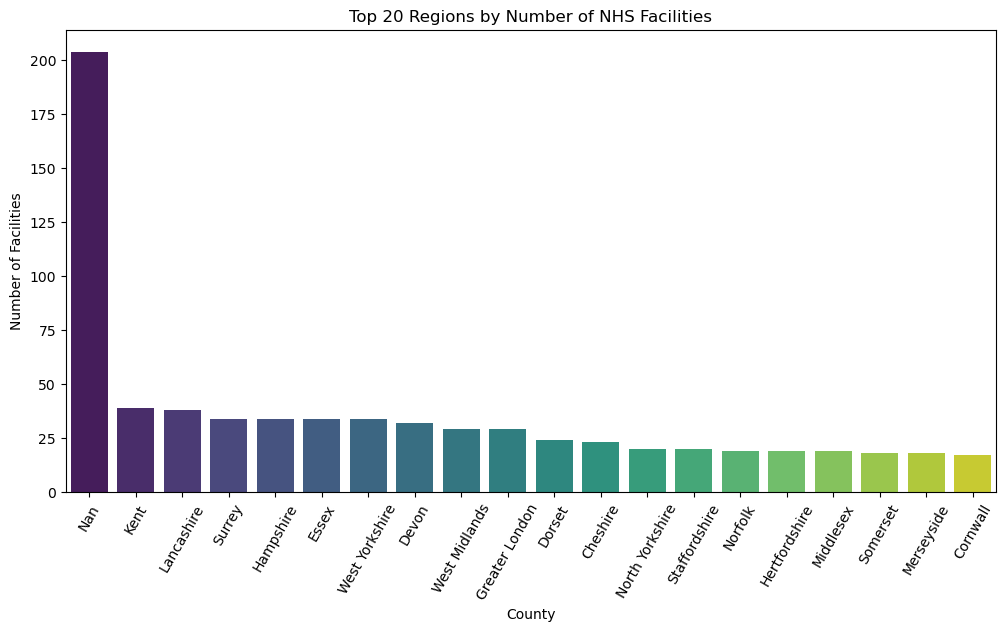

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=region_counts.head(20), x='County', y='Facility_Count', palette='viridis')
plt.xticks(rotation=60)
plt.title("Top 20 Regions by Number of NHS Facilities")
plt.ylabel("Number of Facilities")
plt.xlabel("County")
plt.show()


In [11]:
# Convert to numeric, turn invalid values (like 'missing') into NaN
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')

# Drop rows where coordinates are missing
data = data.dropna(subset=['Latitude', 'Longitude'])


In [12]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[54.5, -3], zoom_start=6)

heat_data = data[['Latitude', 'Longitude']].values.tolist()

HeatMap(heat_data, radius=12).add_to(m)

m


In [13]:
from folium.plugins import MarkerCluster

m2 = folium.Map(location=[54.5, -3], zoom_start=6)
cluster = MarkerCluster().add_to(m2)

for _, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['OrganisationName']
    ).add_to(cluster)

m2


In [14]:
import pandas as pd

pop = pd.DataFrame({
    'Region': [
        'London', 'South East', 'North West', 'East of England', 'West Midlands',
        'South West', 'Yorkshire and The Humber', 'East Midlands', 'North East'
    ],
    'Population': [
        8962000, 9180000, 7340000, 6230000, 5930000,
        5620000, 5500000, 4830000, 2660000
    ]
})

pop



,Region,Population
0,London,8962000
1,South East,9180000
2,North West,7340000
3,East of England,6230000
4,West Midlands,5930000
5,South West,5620000
6,Yorkshire and The Humber,5500000
7,East Midlands,4830000
8,North East,2660000


In [15]:
data['County'] = data['County'].astype(str).str.title()
pop['Region'] = pop['Region'].astype(str).str.title()

facility_counts = data['County'].value_counts().reset_index()
facility_counts.columns = ['Region', 'Facility_Count']


In [16]:
merged = pop.merge(facility_counts, on='Region', how='left')
merged['Facility_Count'] = merged['Facility_Count'].fillna(0)


In [17]:
merged['Population_Per_Facility'] = merged['Population'] / merged['Facility_Count'].replace(0, 1)
merged


,Region,Population,Facility_Count,Population_Per_Facility
0,London,8962000,0.0,8.962000e+06
1,South East,9180000,0.0,9.180000e+06
2,North West,7340000,0.0,7.340000e+06
3,East Of England,6230000,0.0,6.230000e+06
4,West Midlands,5930000,29.0,2.044828e+05
5,South West,5620000,0.0,5.620000e+06
6,Yorkshire And The Humber,5500000,0.0,5.500000e+06
7,East Midlands,4830000,0.0,4.830000e+06
8,North East,2660000,0.0,2.660000e+06


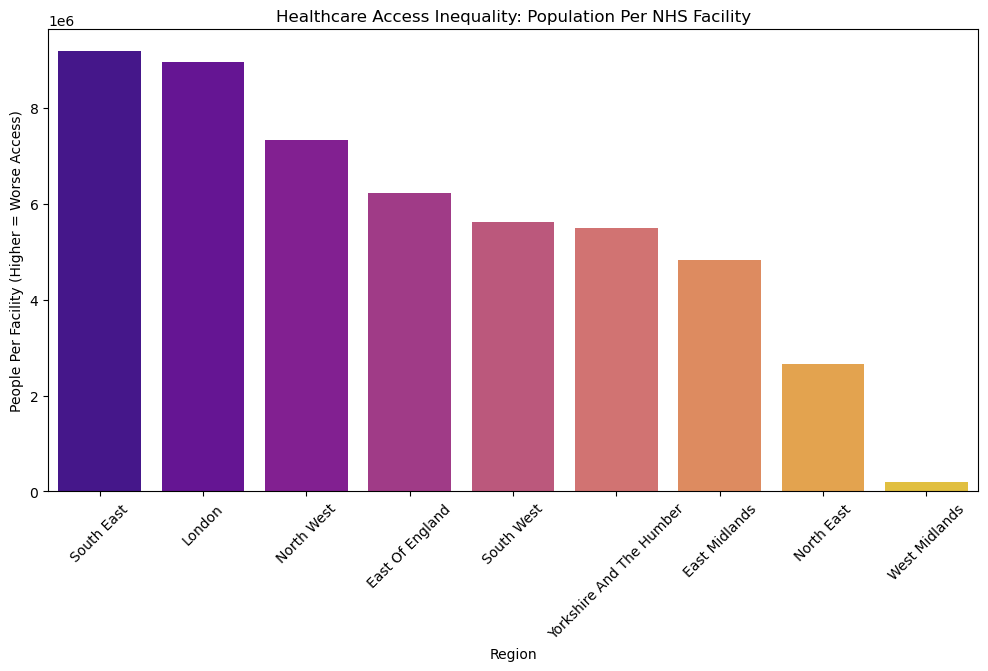

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

merged_sorted = merged.sort_values(by='Population_Per_Facility', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=merged_sorted, x='Region', y='Population_Per_Facility', palette='plasma')
plt.xticks(rotation=45)
plt.title("Healthcare Access Inequality: Population Per NHS Facility")
plt.ylabel("People Per Facility (Higher = Worse Access)")
plt.show()
